# 15. MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}') 


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


In [3]:
from tensorflow.keras.utils import to_categorical 

# convert image datatype from integers to floats 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

# normalising piel values 
X_train = X_train/255.0
X_test = X_test/255.0

# reshape images to add channel dimension 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) 

# One-hot encoding label 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)


In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

model = Sequential() 

# Layer 1 
# Conv 1 
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation = 'relu', input_shape = (28,28,1))) 
# Pooling 1 
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) 

# Layer 2 
# Conv 2 
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation='relu')) 
# Pooling 2 
model.add(MaxPooling2D(pool_size = 2, strides = 2)) 

# Flatten 
model.add(Flatten()) 

# Layer 3 
# Fully connected layer 1 
model.add(Dense(units=120, activation='relu')) 

#Layer 4 
#Fully connected layer 2 
model.add(Dense(units=84, activation='relu')) 

#Layer 5 
#Output Layer 
model.add(Dense(units=10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Aditi\.jupyter\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
epochs = 20
batch_size = 512
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    steps_per_epoch=X_train.shape[0]//batch_size, 
                    validation_data=(X_test, y_test), 
                    validation_steps=X_test.shape[0]//batch_size, verbose = 1) 

_, acc = model.evaluate(X_test, y_test, verbose = 1) 
print('%.3f' % (acc * 100.0)) 




Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6610 - loss: 1.1671 - val_accuracy: 0.9330 - val_loss: 0.2246
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8958 - loss: 0.2216 - val_accuracy: 0.8824 - val_loss: 0.4131
Epoch 3/20
  3/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9296 - loss: 0.2292

C:\Users\Aditi\.jupyter\anaconda\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9356 - loss: 0.2109 - val_accuracy: 0.9588 - val_loss: 0.1323
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.9688 - loss: 0.0800 - val_accuracy: 0.9265 - val_loss: 0.2557
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9605 - loss: 0.1299 - val_accuracy: 0.9698 - val_loss: 0.0913
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.9792 - loss: 0.0445 - val_accuracy: 0.9559 - val_loss: 0.1576
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9700 - loss: 0.0988 - val_accuracy: 0.9779 - val_loss: 0.0709
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9688 - loss: 0.0648 - val_accuracy: 0.9596 - val_loss: 0.1308
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9748 - loss: 0.0801 - val_accuracy: 0.9805 - val_loss: 0.0602
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.9375 - loss: 0.1789 - val_accuracy: 

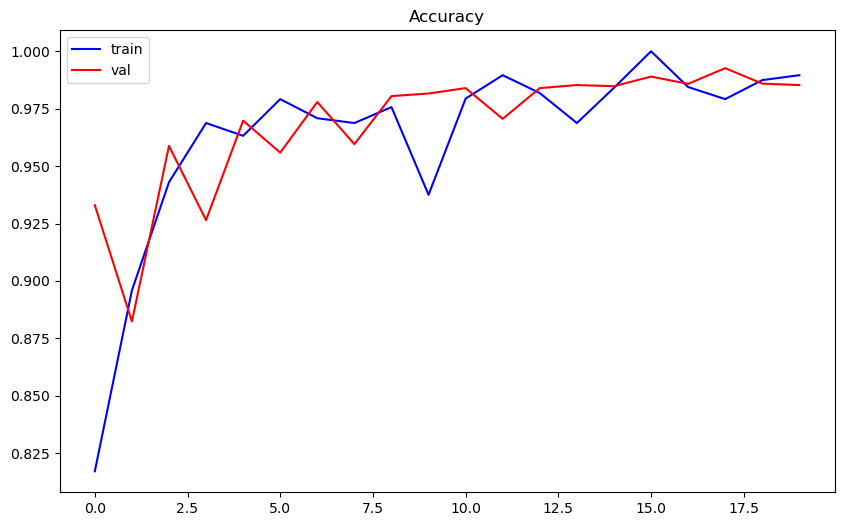

In [6]:
plt.figure(figsize=(10,6)) 
plt.plot(history.history['accuracy'], color = 'blue', label = 'train') 
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val') 
plt.legend() 
plt.title('Accuracy') 
plt.show()